# Introduction 
* This code is adapted from the example provided in the python optimal transport package 

This notebook presents the results of mapping a 1D uniform input distribution to a 2D uniform target distribution using 3 different network sizes (in this order: large, small, medium). 


## Imports

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as pl
import matplotlib.animation as animation
import torch
from torch import nn
import ot
import random
# import sys
# !{sys.executable} -m pip install pot

use_cuda = torch.cuda.is_available()
if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)

seed = 126
torch.manual_seed(seed) # make chunk execution consistent 


__CUDNN VERSION: 8902
__Number CUDA Devices: 1
__CUDA Device Name: NVIDIA GeForce RTX 4080
__CUDA Device Total Memory [GB]: 16.860184576


## Data Functions

In [3]:
torch.manual_seed(seed) # make chunk execution consistent 

sigma = 0.0
n_dims = 2
n_features = 1


def get_data(n_samples):
    # c = torch.rand(size=(n_samples, 2))
    c1 = torch.arange(1, n_samples+1) / (n_samples)# .reshape((n_samples, 1)) / (n_samples)
    c2 = torch.arange(1, n_samples+1) / (n_samples)# .reshape((n_samples, 1)) / (n_samples)
    c = torch.cartesian_prod(c1,c2)
    x = c
    return x

# empirical fill-based loss  
from scipy.spatial.distance import cdist
def fill_distance(data, fitted, type='max'): 
    m = torch.tensor(cdist(data, fitted, 'euclidean')) 
    # m = cdist(data, fitted, 'euclidean')
    min, min_indices = torch.min(m, dim=1) # min across rows 
    if type=='max':
        fill_dist = max(min)
    elif type=='mean':
        fill_dist = torch.mean(min)
    else:
        fill_dist = max(min)

    return fill_dist.item() # get actual float 


## Plot data



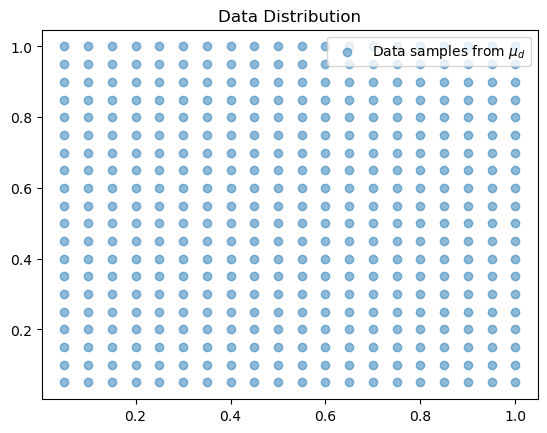

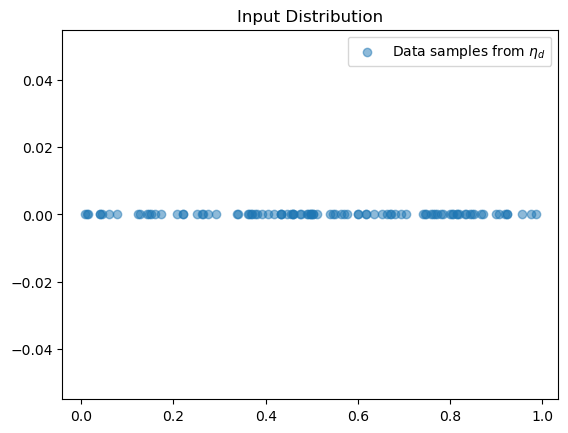

In [4]:
torch.manual_seed(seed) # make chunk execution consistent 

# plot the distributions
x = get_data(20)
pl.figure(1)
pl.scatter(x[:, 0], x[:, 1], label='Data samples from $\mu_d$', alpha=0.5)
pl.title('Data Distribution')
pl.legend()

xn = torch.rand(100, n_features)
yn = torch.zeros(100)
pl.figure(2)
# pl.scatter(xn[:, 0], xn[:, 1], label='Data samples from $\eta_d$', alpha=0.5)
pl.scatter(xn[:, 0],yn, label='Data samples from $\eta_d$', alpha=0.5)
pl.title('Input Distribution')
pl.legend()


## Generator Model



In [1]:
torch.manual_seed(seed) # make chunk execution consistent 


class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.n_features = 1
        self.n_out = 2
        n= 200
        leaky = 0.0001
        self.model = nn.Sequential( 
            nn.Linear(self.n_features, n),
            nn.LeakyReLU(leaky),
            nn.Linear(n, n),
            nn.LeakyReLU(leaky),
            nn.Linear(n, n),
            nn.LeakyReLU(leaky),
            nn.Linear(n, n),
            nn.LeakyReLU(leaky),
            nn.Linear(n, n),
            nn.LeakyReLU(leaky),
            # nn.Linear(n, self.n_out),
        )
        self.model.append(nn.Linear(n, self.n_out))
        
    def forward(self, x):
        x = self.model(x)
        return x
    
class Generator2(torch.nn.Module):
    def __init__(self):
        super(Generator2, self).__init__()
        self.n_features = 1
        self.n_out = 2
        n= 10 # 50, 10000 iterations does not give super close approximation 
        leaky = 0.0001
        self.model = nn.Sequential( 
            nn.Linear(self.n_features, n),
            nn.LeakyReLU(leaky),
            nn.Linear(n, n),
            nn.LeakyReLU(leaky),
            nn.Linear(n, self.n_out),
        )
    def forward(self, x):
        x = self.model(x)
        return x
            
class Generator3(torch.nn.Module):
    def __init__(self):
        super(Generator3, self).__init__()
        self.n_features = 1
        self.n_out = 2
        n= 100
        leaky = 0.0001
        self.model = nn.Sequential( 
            nn.Linear(self.n_features, n),
            nn.LeakyReLU(leaky),
            nn.Linear(n, n),
            nn.LeakyReLU(leaky),
            nn.Linear(n, n),
            nn.LeakyReLU(leaky),
            nn.Linear(n, self.n_out),
        )
    def forward(self, x):
        x = self.model(x)
        return x
    
g1 = Generator()
g2 = Generator2()
g3 = Generator3()
num_hidden_layers = sum(1 for _ in g1.modules() if isinstance(_, nn.Linear)) -1
print(f"The number of hidden layers in G1 is: {num_hidden_layers}")
num_hidden_layers = sum(1 for _ in g2.modules() if isinstance(_, nn.Linear)) -1
print(f"The number of hidden layers in G2 is: {num_hidden_layers}")
num_hidden_layers = sum(1 for _ in g3.modules() if isinstance(_, nn.Linear)) -1
print(f"The number of hidden layers in G3 is: {num_hidden_layers}")

            

NameError: name 'torch' is not defined

## Training the model



Iter: 0, 	 wass-loss=0.75364, 	 fill-dist=0.81965
Iter: 10, 	 wass-loss=0.16852, 	 fill-dist=0.33973
Iter: 20, 	 wass-loss=0.10394, 	 fill-dist=0.26127
Iter: 30, 	 wass-loss=0.08796, 	 fill-dist=0.23952
Iter: 40, 	 wass-loss=0.09127, 	 fill-dist=0.23977
Iter: 50, 	 wass-loss=0.08667, 	 fill-dist=0.24048
Iter: 60, 	 wass-loss=0.08616, 	 fill-dist=0.24241
Iter: 70, 	 wass-loss=0.0851, 	 fill-dist=0.24105
Iter: 80, 	 wass-loss=0.08484, 	 fill-dist=0.239
Iter: 90, 	 wass-loss=0.08466, 	 fill-dist=0.23879
Iter: 100, 	 wass-loss=0.08475, 	 fill-dist=0.24018
Iter: 110, 	 wass-loss=0.08397, 	 fill-dist=0.23816
Iter: 120, 	 wass-loss=0.08416, 	 fill-dist=0.23719
Iter: 130, 	 wass-loss=0.08374, 	 fill-dist=0.23685
Iter: 140, 	 wass-loss=0.08373, 	 fill-dist=0.23702
Iter: 150, 	 wass-loss=0.08359, 	 fill-dist=0.23692
Iter: 160, 	 wass-loss=0.08346, 	 fill-dist=0.2368
Iter: 170, 	 wass-loss=0.08328, 	 fill-dist=0.23622
Iter: 180, 	 wass-loss=0.08285, 	 fill-dist=0.23544
Iter: 190, 	 wass-loss=0.08

Text(0.5, 0, 'Iterations')

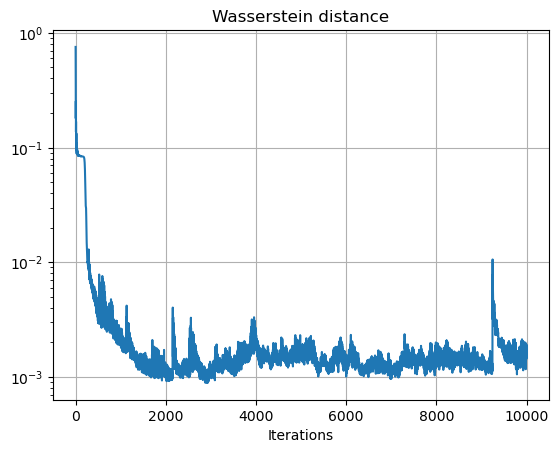

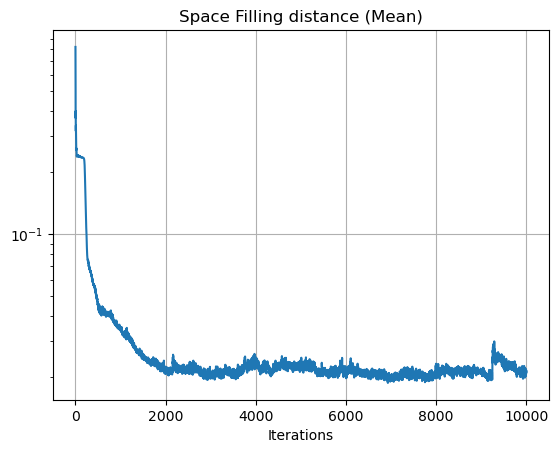

In [10]:
torch.manual_seed(seed) # make chunk execution consistent 

G = Generator()
optimizer = torch.optim.RMSprop(G.parameters(), lr=0.00019, eps=1e-6)
# optimizer = torch.optim.RMSprop(G.parameters(), lr=0.00019, eps=1e-5, weight_decay=1e-15)

# number of iteration and size of the batches
n_iter = 10000 
size_batch = 30 # need to square this to facilitate cartesian product in get_data()

# generate static samples to see their trajectory along training
n_visu = 1000
xnvisu = torch.arange(1, n_visu+1).reshape((n_visu, n_features)) / (n_visu)
xvisu = torch.zeros(n_iter, n_visu, n_dims)
ab = torch.ones(size_batch**2) / size_batch**2 
losses = []
fill_losses = []

# train mode
G.train()

for i in range(n_iter):

    # generate noise samples
    # xn = torch.rand(size_batch**2, n_features) # random sample every iteration 
    xn = torch.arange(1, size_batch**2+1).reshape((size_batch**2, n_features)) / (size_batch**2)

    # generate data samples
    xd = get_data(size_batch) # constant grid 

    # generate sample along iterations
    G.eval()
    xvisu[i, :, :] = G(xnvisu).detach()

    # generate samples and compute distance matrix
    G.train()
    xg = G(xn)

    M = ot.dist(xg, xd)
    loss = ot.emd2(ab, ab, M)
    losses.append(float(loss.detach()))
    # print(losses)

    fill_loss = fill_distance(xd.detach().numpy(), xg.detach().numpy(), type='mean')
    fill_losses.append(fill_loss)

    if i % 10 == 0:
        # print("Iter: {:3d}, loss={}".format(i, losses[-1]))
        print(f"Iter: {i}, \t wass-loss={round(losses[-1], 5)}, \t fill-dist={round(fill_loss, 5)}")

    loss.backward()
    optimizer.step()

    del M
    
pl.figure(2)
pl.semilogy(losses)
pl.grid()
pl.title('Wasserstein distance')
pl.xlabel("Iterations")

pl.figure(3)
pl.semilogy(fill_losses)
pl.grid()
pl.title('Space Filling distance (Mean)')
pl.xlabel("Iterations")

## Plot trajectories of generated samples along iterations



[0.830545517256828, 0.24029120061680287, 0.09165951305338732, 0.04463625339458492, 0.034715807119738075, 0.020912440229983315, 0.021951261963017082, 0.020629644707173257, 0.021277893488916302]


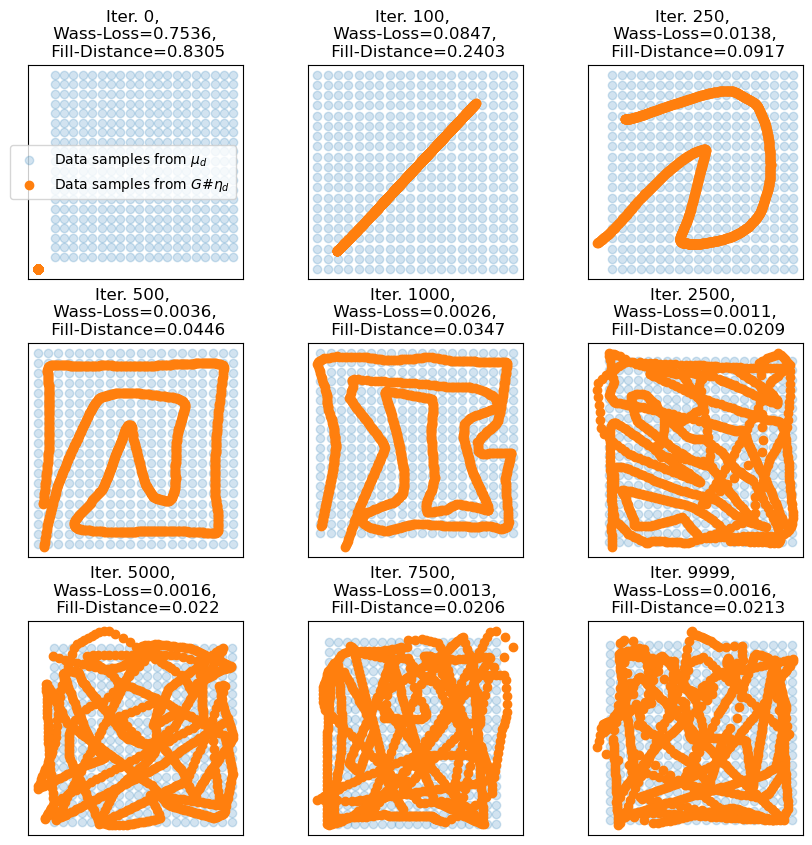

In [17]:
torch.manual_seed(seed) # make chunk execution consistent 

# ivisu = [0, 10, 50, 100, 150, 1000, n_iter-500, n_iter-250, n_iter-1]
ivisu = [0, 100, 250, 500, 1000, 2500, 5000, 7500, n_iter-1]

xd = get_data(20)
fill_distances = []

pl.figure(3, (10, 10))

for i in range(9):
    fill_distances.append(fill_distance(xd, xvisu[ivisu[i], :], type='mean'))

    pl.subplot(3, 3, i + 1)

    # Use the distances to map to colors
    progression = np.linspace(0, 1, n_visu)  # Normalize progression to [0, 1]
    
    pl.scatter(xd[:, 0], xd[:, 1], label='Data samples from $\mu_d$', alpha=0.2)
    pl.scatter(xvisu[ivisu[i], :, 0], xvisu[ivisu[i], :, 1], 
               label='Data samples from $G\#\eta_d$', 
               alpha=1,
                #c = progression,
                #cmap='Oranges'
                )

    pl.xticks(())
    pl.yticks(())
    pl.title(f'Iter. {ivisu[i]}, \n Wass-Loss={round(losses[ivisu[i]], 4)}, \n Fill-Distance={round(fill_distances[-1], 4)}')
    if i == 0:
        pl.legend()
    
# adjust the spacing
pl.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

print(fill_distances)


## Generator 2 - Small Network



Iter: 0, 	 wass-loss=0.33081, 	 fill-dist=0.51216
Iter: 10, 	 wass-loss=0.28219, 	 fill-dist=0.46881
Iter: 20, 	 wass-loss=0.2546, 	 fill-dist=0.44394
Iter: 30, 	 wass-loss=0.2357, 	 fill-dist=0.42585
Iter: 40, 	 wass-loss=0.22035, 	 fill-dist=0.41106
Iter: 50, 	 wass-loss=0.2066, 	 fill-dist=0.39843
Iter: 60, 	 wass-loss=0.1949, 	 fill-dist=0.38746
Iter: 70, 	 wass-loss=0.18548, 	 fill-dist=0.37802
Iter: 80, 	 wass-loss=0.17668, 	 fill-dist=0.36952
Iter: 90, 	 wass-loss=0.16921, 	 fill-dist=0.36213
Iter: 100, 	 wass-loss=0.16367, 	 fill-dist=0.35555
Iter: 110, 	 wass-loss=0.15659, 	 fill-dist=0.34971
Iter: 120, 	 wass-loss=0.15216, 	 fill-dist=0.3448
Iter: 130, 	 wass-loss=0.14718, 	 fill-dist=0.33944
Iter: 140, 	 wass-loss=0.1443, 	 fill-dist=0.33514
Iter: 150, 	 wass-loss=0.14108, 	 fill-dist=0.33138
Iter: 160, 	 wass-loss=0.13813, 	 fill-dist=0.32823
Iter: 170, 	 wass-loss=0.13764, 	 fill-dist=0.32561
Iter: 180, 	 wass-loss=0.13579, 	 fill-dist=0.32359
Iter: 190, 	 wass-loss=0.1345

Text(0.5, 0, 'Iterations')

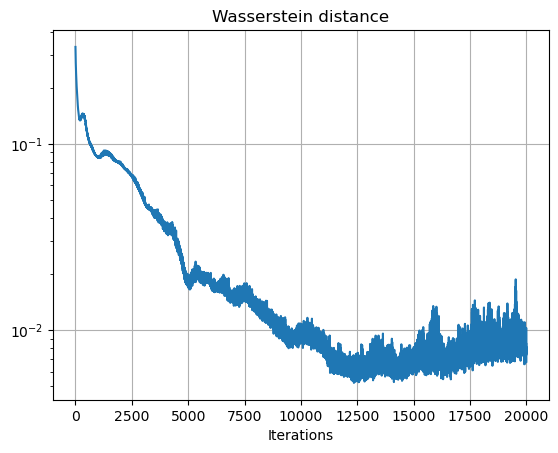

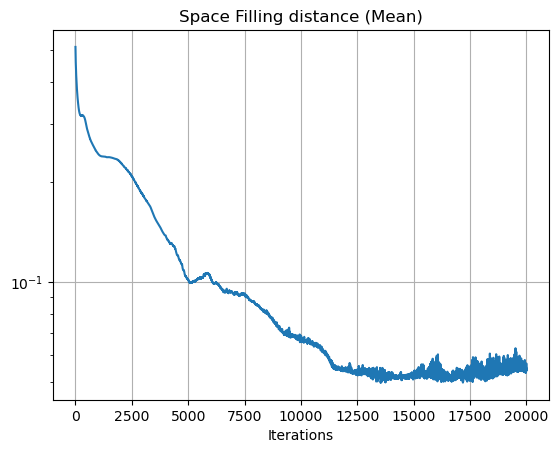

In [19]:
torch.manual_seed(seed) # make chunk execution consistent 

G = Generator2()
optimizer = torch.optim.RMSprop(G.parameters(), lr=0.00019, eps=1e-6)
# optimizer = torch.optim.RMSprop(G.parameters(), lr=0.00019, eps=1e-5, weight_decay=1e-15)

# number of iteration and size of the batches
n_iter = 20000 
size_batch = 30 # need to square this to facilitate cartesian product in get_data()

# generate static samples to see their trajectory along training
n_visu = size_batch**2
xnvisu = torch.arange(1, n_visu+1).reshape((n_visu, n_features)) / (n_visu)
xvisu = torch.zeros(n_iter, n_visu, n_dims)
ab = torch.ones(size_batch**2) / size_batch**2 
losses = []
fill_losses = []

# train mode
G.train()

for i in range(n_iter):

    # generate noise samples
    xn = torch.rand(size_batch**2, n_features) # random sample every iteration 
    # xn = torch.arange(1, size_batch+1).reshape((size_batch, n_features)) / (size_batch)

    # generate data samples
    xd = get_data(size_batch) # constant grid 

    # generate sample along iterations
    G.eval()
    xvisu[i, :, :] = G(xnvisu).detach()

    # generate samples and compute distance matrix
    G.train()
    xg = G(xn)

    M = ot.dist(xg, xd)
    loss = ot.emd2(ab, ab, M)
    losses.append(float(loss.detach()))
    # print(losses)

    fill_loss = fill_distance(xd.detach().numpy(), xg.detach().numpy(), type='mean')
    fill_losses.append(fill_loss)

    if i % 10 == 0:
        # print("Iter: {:3d}, loss={}".format(i, losses[-1]))
        print(f"Iter: {i}, \t wass-loss={round(losses[-1], 5)}, \t fill-dist={round(fill_loss, 5)}")

    loss.backward()
    optimizer.step()

    del M
    
pl.figure(2)
pl.semilogy(losses)
pl.grid()
pl.title('Wasserstein distance')
pl.xlabel("Iterations")

pl.figure(3)
pl.semilogy(fill_losses)
pl.grid()
pl.title('Space Filling distance (Mean)')
pl.xlabel("Iterations")

[0.830545517256828, 0.24029120061680287, 0.09165951305338732, 0.04463625339458492, 0.034715807119738075, 0.020912440229983315, 0.021951261963017082, 0.020629644707173257, 0.021277893488916302]


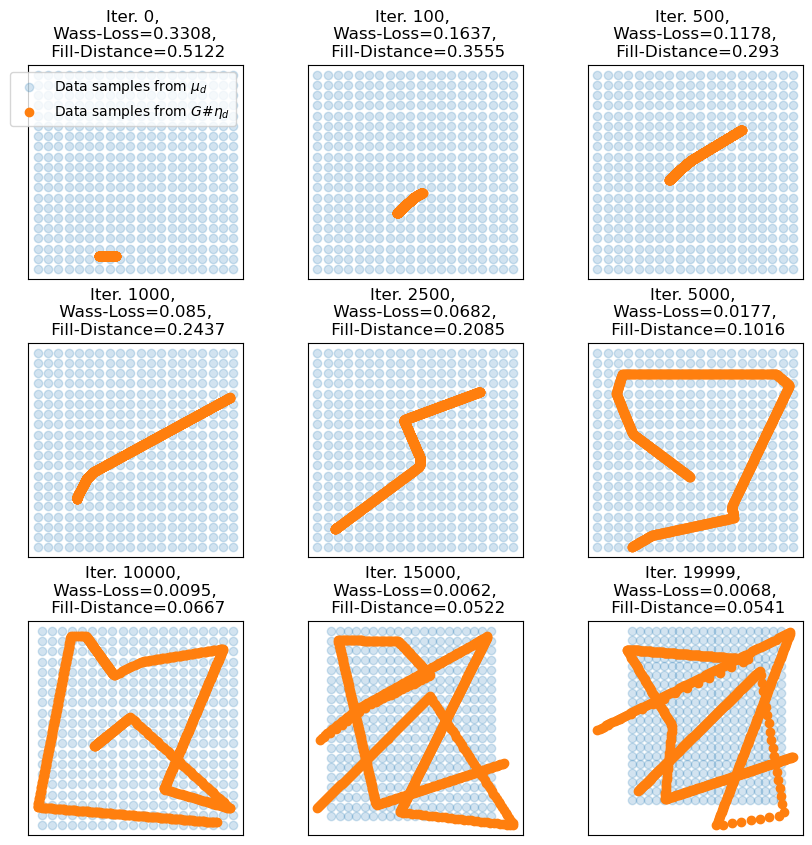

In [24]:
torch.manual_seed(seed) # make chunk execution consistent 

# ivisu = [0, 10, 50, 100, 150, 1000, n_iter-500, n_iter-250, n_iter-1]
ivisu = [0, 100, 500, 1000, 2500, 5000, 10000, 15000, n_iter-1]

xd = get_data(20)

pl.figure(3, (10, 10))

for i in range(9):

    pl.subplot(3, 3, i + 1)

    # Use the distances to map to colors
    progression = np.linspace(0, 1, n_visu)  # Normalize progression to [0, 1]
    
    pl.scatter(xd[:, 0], xd[:, 1], label='Data samples from $\mu_d$', alpha=0.2)
    pl.scatter(xvisu[ivisu[i], :, 0], xvisu[ivisu[i], :, 1], 
               label='Data samples from $G\#\eta_d$', 
               alpha=1,
                #c = progression,
                #cmap='Oranges'
                )

    pl.xticks(())
    pl.yticks(())
    pl.title(f'Iter. {ivisu[i]}, \n Wass-Loss={round(losses[ivisu[i]], 4)}, \n Fill-Distance={round(fill_losses[ivisu[i]], 4)}')
    if i == 0:
        pl.legend()
    
# adjust the spacing
pl.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

print(fill_distances)


## Generator 3 - medium

Iter: 0, 	 wass-loss=0.90449, 	 fill-dist=0.90031
Iter: 10, 	 wass-loss=0.16667, 	 fill-dist=0.33385
Iter: 20, 	 wass-loss=0.11204, 	 fill-dist=0.2829
Iter: 30, 	 wass-loss=0.14438, 	 fill-dist=0.29676
Iter: 40, 	 wass-loss=0.09357, 	 fill-dist=0.25718
Iter: 50, 	 wass-loss=0.10758, 	 fill-dist=0.25478
Iter: 60, 	 wass-loss=0.08774, 	 fill-dist=0.24392
Iter: 70, 	 wass-loss=0.0884, 	 fill-dist=0.2424
Iter: 80, 	 wass-loss=0.08761, 	 fill-dist=0.24182
Iter: 90, 	 wass-loss=0.08601, 	 fill-dist=0.24145
Iter: 100, 	 wass-loss=0.09443, 	 fill-dist=0.24217
Iter: 110, 	 wass-loss=0.08597, 	 fill-dist=0.24262
Iter: 120, 	 wass-loss=0.08766, 	 fill-dist=0.24267
Iter: 130, 	 wass-loss=0.08369, 	 fill-dist=0.24225
Iter: 140, 	 wass-loss=0.08594, 	 fill-dist=0.2457
Iter: 150, 	 wass-loss=0.08255, 	 fill-dist=0.2433
Iter: 160, 	 wass-loss=0.08264, 	 fill-dist=0.24351
Iter: 170, 	 wass-loss=0.0817, 	 fill-dist=0.24384
Iter: 180, 	 wass-loss=0.08276, 	 fill-dist=0.24452
Iter: 190, 	 wass-loss=0.0800

Text(0.5, 0, 'Iterations')

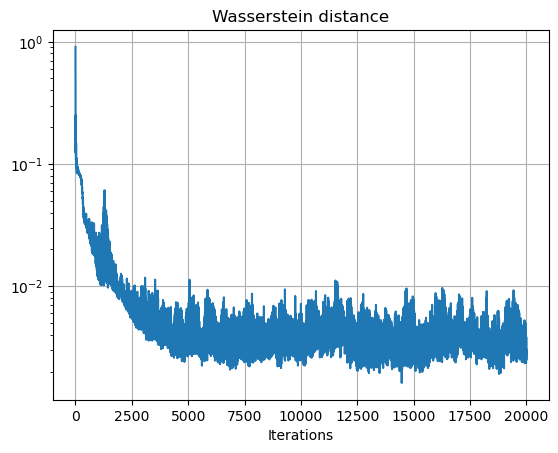

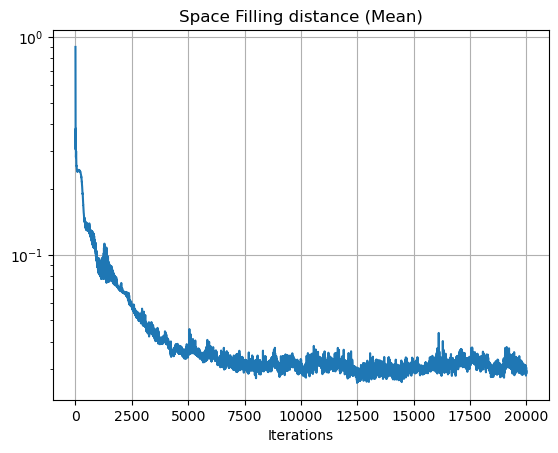

In [25]:
torch.manual_seed(seed) # make chunk execution consistent 

G = Generator3()
optimizer = torch.optim.RMSprop(G.parameters(), lr=0.00019, eps=1e-6)
# optimizer = torch.optim.RMSprop(G.parameters(), lr=0.00019, eps=1e-5, weight_decay=1e-15)

# number of iteration and size of the batches
n_iter = 20000 
size_batch = 30 # need to square this to facilitate cartesian product in get_data()

# generate static samples to see their trajectory along training
n_visu = 1000
xnvisu = torch.arange(1, n_visu+1).reshape((n_visu, n_features)) / (n_visu)
xvisu = torch.zeros(n_iter, n_visu, n_dims)
ab = torch.ones(size_batch**2) / size_batch**2 
losses = []
fill_losses = []

# train mode
G.train()

for i in range(n_iter):

    # generate noise samples
    xn = torch.rand(size_batch**2, n_features) # random sample every iteration 
    # xn = torch.arange(1, size_batch+1).reshape((size_batch, n_features)) / (size_batch)

    # generate data samples
    xd = get_data(size_batch) # constant grid

    # generate sample along iterations
    G.eval()
    xvisu[i, :, :] = G(xnvisu).detach()

    # generate samples and compute distance matrix
    G.train()
    xg = G(xn)

    M = ot.dist(xg, xd)
    loss = ot.emd2(ab, ab, M)
    losses.append(float(loss.detach()))
    # print(losses)

    fill_loss = fill_distance(xd.detach().numpy(), xg.detach().numpy(), type='mean')
    fill_losses.append(fill_loss)

    if i % 10 == 0:
        # print("Iter: {:3d}, loss={}".format(i, losses[-1]))
        print(f"Iter: {i}, \t wass-loss={round(losses[-1], 5)}, \t fill-dist={round(fill_loss, 5)}")

    loss.backward()
    optimizer.step()

    del M
    
pl.figure(2)
pl.semilogy(losses)
pl.grid()
pl.title('Wasserstein distance')
pl.xlabel("Iterations")

pl.figure(3)
pl.semilogy(fill_losses)
pl.grid()
pl.title('Space Filling distance (Mean)')
pl.xlabel("Iterations")

[0.830545517256828, 0.24029120061680287, 0.09165951305338732, 0.04463625339458492, 0.034715807119738075, 0.020912440229983315, 0.021951261963017082, 0.020629644707173257, 0.021277893488916302]


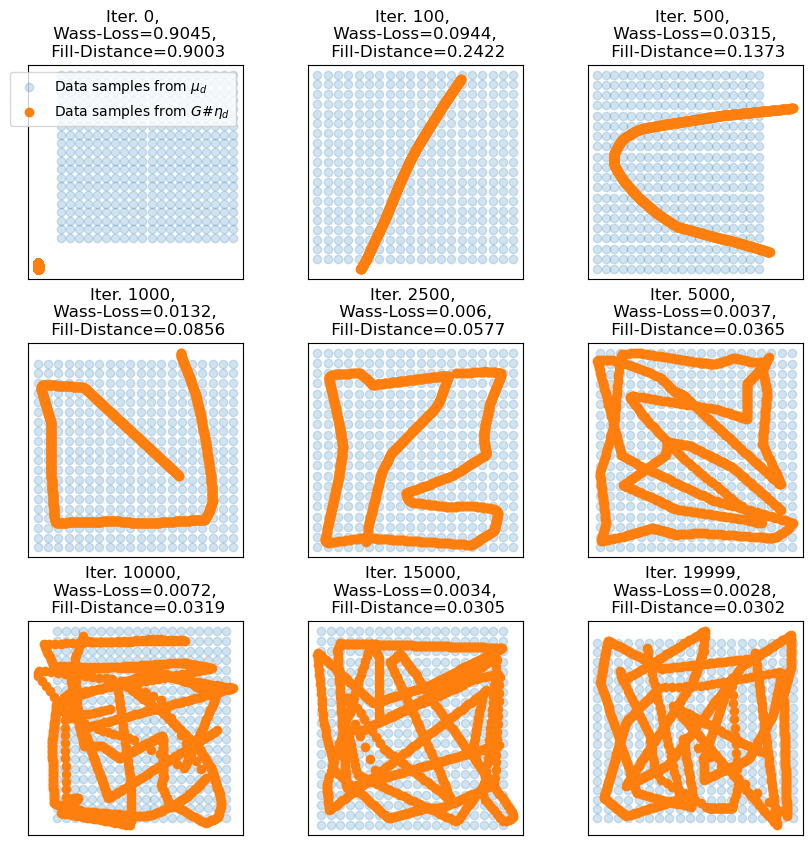

In [33]:
torch.manual_seed(seed) # make chunk execution consistent 

# ivisu = [0, 10, 50, 100, 150, 1000, n_iter-500, n_iter-250, n_iter-1]
ivisu = [0, 1000, 2500, 5000, 10000, 12500, 15000, 17500, n_iter-1]
ivisu = [0, 100, 500, 1000, 2500, 5000, 10000, 15000, n_iter-1]

xd = get_data(20)

pl.figure(3, (10, 10))

for i in range(9):

    pl.subplot(3, 3, i + 1)

    # use the distances to map to colors
    progression = np.linspace(0, 1, n_visu)  # Normalize progression to [0, 1], not used here 
    
    pl.scatter(xd[:, 0], xd[:, 1], label='Data samples from $\mu_d$', alpha=0.2)
    pl.scatter(xvisu[ivisu[i], :, 0], xvisu[ivisu[i], :, 1], 
               label='Data samples from $G\#\eta_d$', 
               alpha=1,
                #c = progression,
                #cmap='Oranges'
                )

    pl.xticks(())
    pl.yticks(())
    pl.title(f'Iter. {ivisu[i]}, \n Wass-Loss={round(losses[ivisu[i]], 4)}, \n Fill-Distance={round(fill_losses[ivisu[i]], 4)}')
    if i == 0:
        pl.legend()
    
# adjust the spacing
pl.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

print(fill_distances)
